# Trabajo práctico 1. Introducción al Análisis de Datos

## ¿Qué tan cálida era Europa en los últimos 500 años?

**Problema.** Intentaremos responder las siguientes preguntas:

1. ¿Cuál era la temperatura extrema en los últimos 500 años en Europa?

2. ¿Cómo evolucionó la temperatura?

3. ¿Cómo era en un determinado punto del tiempo (fecha o aproximación)?

## 1. Obtención de datos

Para esta práctica vamos a usar dos datasets podemos verlos en los siguientes links, les recomendamos descargarlos y ubicarlos en la ruta donde tenga su notebook y usen sus archivos ahi:

- [Europe seasonal data](https://raw.githubusercontent.com/FIUBA-Posgrado-Inteligencia-Artificial/CEIA_Analisis_de_datos/main/clase_1/practicas/data/europe-seasonal.txt)
- [Europe GDX file](https://drive.google.com/drive/folders/1qBUspt_avXUNhtQ5CV0U2VNxQjnurwWh?usp=sharing)

**Nota**: En caso de estar usando google colab no es necesario que descarguen ***Europe seasonal data*** pero el archivo los archivos ***Europe GDX*** van a tener que conectarlo con el file system de colab. Pueden clickear en el logo con forma de carpetita <img src="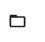 "></img> y a partir de ahi pueden subir archivos temporales y accederlos. 

O bien pueden seguir esta [guía](https://colab.research.google.com/notebooks/io.ipynb#scrollTo=BaCkyg5CV5jF). En cualquier caso si tienen problemas nos pueden avisar y lo revisamos.

In [ ]:
# Cambiar a lo que corresponda
DATASET_PATH = "./data"

In [ ]:
!ls {DATASET_PATH}

In [ ]:
!tail {DATASET_PATH}/europe-seasonal.txt

## 2. Análisis exploratorio inicial

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [3]:
# Observaciones 
# 1: Year
# 2: Winter (December-January-February) averaged absolute surface air temperature
# 3: Spring (March-April-May) averaged absolute surface air temperature
# 4: Summer (June-July-August) averaged absolute surface air temperature
# 5: Autumn (September-October-November) averaged absolute surface air temperature
# 6: Annual averaged absolute surface air temperature 
df = pd.read_csv("europe-seasonal.dat",
                 names=["year","winter","spring","summer","autumn","annual"],
                 delim_whitespace=True 
)
df.head(5)

,year,winter,spring,summer,autumn,annual
0,1500,-0.945,7.157,17.483,8.990,8.166
1,1501,-0.850,7.435,17.401,8.687,8.163
2,1502,-1.053,6.872,17.906,9.071,8.194
3,1503,-2.134,7.210,18.331,8.922,8.077
4,1504,-1.881,7.254,18.223,9.075,8.163


Obtener alguna información básica sobre la temperatura en Europa en los últimos 500 años.

In [26]:
winter_min = df['winter'].min()
print(df[df.winter == df.winter.min()])
print("La temperatura promedio más baja en invierno es: {:+7.3f}C".format(winter_min))
print("Esto ocurrió en el año: {}".format(year_winter_min))

     year  winter  spring  summer  autumn  annual
209  1709  -4.152   6.631  17.621   9.142   7.616
La temperatura promedio más baja en invierno es:  -4.152C
Esto ocurrió en el año:      year  winter  spring  summer  autumn  annual
209  1709  -4.152   6.631  17.621   9.142   7.616


In [23]:
winter_max = df['winter'].max()
year_winter_max = df[df.winter == df.winter.max()]['year']
print("La temperatura promedio más alta en invierno es: {:+7.3f}C".format(winter_max))
print("Esto ocurrió en el año: {}".format(year_winter_max))

La temperatura promedio más alta en invierno es:  +1.734C
Esto ocurrió en el año: 490    1990
Name: year, dtype: int64


In [ ]:
summer_min = 0 # COMPLETAR
year_summer_min = 0 # COMPLETAR
print("La temperatura promedio más baja en verano es: {:+7.3f}C".format(summer_min))
print("Esto ocurrió en el año: {}".format(year_summer_min))

In [ ]:
summer_max = 0 # COMPLETAR
year_summer_max = 0 # COMPLETAR
print("La temperatura promedio más alta en invierno es: {:+7.3f}C".format(summer_max))
print("Esto ocurrió en el año: {}".format(year_summer_max))

In [28]:
df['winter'].mean()


-1.03970099009901

In [ ]:
min_annual_temperature = df['
min_annual_temperature_year = 0  # COMPLETAR
max_annual_temperature = 0  # COMPLETAR
max_annual_temperature_year = 0 # COMPLETAR
print("La temperatura anual promedio varió entre {:+.3f}C en el año {} a {:+.3f}C en el año {}.".format( 
    min_annual_temperature, min_annual_temperature_year,
    max_annual_temperature, max_annual_temperature_year
))

Nota. De ahora en más, para obtener estadísticas generales usaremos la función *describe()*.

In [29]:
df.describe()

,year,winter,spring,summer,autumn,annual
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,1752.000000,-1.039701,7.121756,17.640590,9.050127,8.211590
std,145.925209,1.115802,0.652947,0.460553,0.515988,0.434923
min,1500.000000,-4.152000,5.075000,16.477000,7.532000,7.006000
25%,1626.000000,-1.795000,6.734000,17.343000,8.745000,7.960000
50%,1752.000000,-0.914000,7.092000,17.607000,9.046000,8.215000
75%,1878.000000,-0.250000,7.503000,17.906000,9.383000,8.477000
max,2004.000000,1.734000,9.263000,19.615000,10.554000,9.664000


## 3. Gráfico de tendencia de la temperatura

El análisis anterior nos dió una primera impresión de los valores de la temperatura en la segunda mitad del pasado mileno.
No obstante, para tener una visión más completa, es conveniente recurrir a un gráfico de tendencia como el que se muestra a continuación:

<center>
    <img src="assets/tendencia_temperatura_completo.png"/>
</center>

Escribir una función *plot_temperature_trends* que permita graficar la tendencia de las series correspondientes a las cuatro estaciones para los años indicados. Si no se especifica ningún año de inicio y/o fin utilizar el mínimo y máximo de la serie respectivamente.

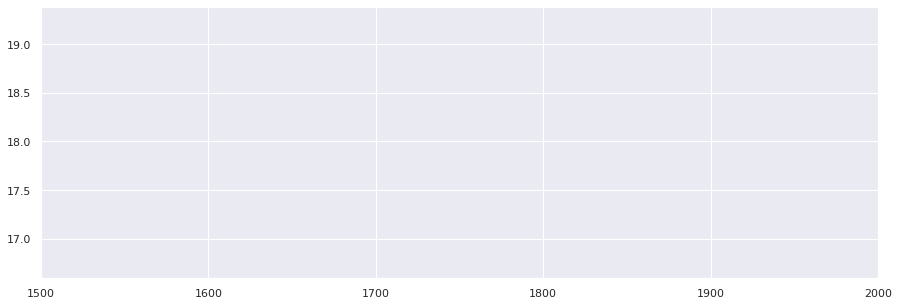

In [86]:
def plot_temperature_trends(df,filename,start_year=None,end_year=None):
    """Realiza un gráfico de tendencia y lo almacena en un archivo.

    :param df: Dataframe con valores de temperaturas anuales. 
               Debe contener las columnas 'year' y 'autumn','winter','spring','summer', 'annual'.               
    :type pd.Dataframe        
    :param filename: Nombre del archivo de salida
    :type string        
    :param start_year: Año inicial. Si se omite, es el primero de la serie.
    :type int, optional
    :param end_year: Año final. Si se omite, es el último de la serie.
    :type int, optional        
    """
    plt.figure(figsize=(15,5))
    
    plt.xlim(start_year, end_year)
        
    #sns.lineplot(x='year', y='winter', data=df)
    #sns.lineplot(x='year', y='autumn', data=df)
    #sns.lineplot(x='year', y='spring', data=df)
    #sns.lineplot(x='year', y='summer', data=df)
    
    df['summer'].rolling(window=2).mean().plot()
         
    #sns.lineplot(smooth)
                   
    #sns.lineplot(x='year',data=mean)


    
plot_temperature_trends(df,filename="tendencia_temperatura_completo.png",start_year=1500,end_year=2000)

In [67]:
i = 2
r = 5
L = [1, 2, 3, 4, 5, 6, 7]
[sum(L[i-r:i+r+1]) / (2*r + 1) for i in L]


[2.0,
 1.6363636363636365,
 1.1818181818181819,
 0.6363636363636364,
 2.5454545454545454,
 2.4545454545454546,
 2.272727272727273]

Del gráfico anterior, podemos realizar las siguientes observaciones:

1. Los inviernos siempre son más fríos que la primavera, que a su vez son más frías que los otoños, que a su vez son más frías que el otoño.
2. La temperatura promedio varía más en invierno que en otras estaciones.
3. Las primaveras varían más desde alrededor del comienzo del siglo 19.

Lo que no podemos observar con claridad son tendencias. Podríamos responder, por ejemplo, ¿si está incrementándose la temperatura?
Los números sugieren que la temperatura está incrementándose porque las temperaturas en invierno, verano y promedio ocurren en los años recientes. Sin embargo, estos valors son sólo extremos que pueden o no estar correlacionados con un comportamiento general de la temperatura.

Para observar mejor este fenómeno, podemos utilizar [suavizado](http://en.wikipedia.org/wiki/Smoothing).

Hay diferentes algoritmos de suavizado. Aquí usaremos el [promedio móvil](http://en.wikipedia.org/wiki/Moving_average) en su forma más simple. 

Si la temperatura para una cierta estación en el año $y$ está dada por la variable $L_y$, entonces crearemos nuevas variables:

$$
L'_y := \frac{1}{2r+1} \sum_{k=y-r}^{y+r} L_k,
$$

Por ejemplo, $L'_y$ es el valor promedio entre las temperaturas del año $y-r$ hasta (e incluyendo) $y+r$, donde $r$ (el radio) es un parámetro dado. Cuanto mayor $r$, más mayor el grado de suavizado.

¿Cómo calcular el promedio móvil?

Comencemos por plantearlo para un elemento, el $i$-ésimo. Esto significa computar la suma $\sum_{k=i-r}^{i+r} L_k$ y dividirla por $2r+1$. Esto significa que debemos:

* obtener una parte de la serie: `L[i-r:i+r+1]` (el `+1` está aquí porque el límite izquierdo no se incluye como parte de la nueva lista),

* calcular la suma: $\sum_{k=i-r}^{i+r} L_k =$`sum(L[i-r:i+r+1])`,

* dividir por `2*r+1`: $\frac{1}{2r+1} \sum_{k=i-r}^{i+r} L_k =$ `sum(L[i-r:i+r+1]) / (2*r+1)`.

Pista: en python, se puede repetir el procedimiento anterior para todos los índices posibles `i` utilizando list comprehension.

In [71]:
def smooth(L,r):
    """ Dada una serie, devuelver una nueva serie con el suavizado por promedio móvil para radio r.    
    :param L: Serie
    :type: pd.Series
    :param r: grado de suavizado.
    :type: int
    :return: Serie suavizada
    :rtype: pd.Series
    """
    # COMPLETAR
    #new_series_values = [] # ...
    #return pd.Series(new_series_values)
    print(L)
    return pd.Series([sum(L[i-r:i+r+1]) / (2*r + 1) for i in L])

smooth(df['winter'], 4)

0     -0.945
1     -0.850
2     -1.053
3     -2.134
4     -1.881
       ...  
500    0.743
501    0.996
502    0.207
503   -1.101
504    0.187
Name: winter, Length: 505, dtype: float64


TypeError: cannot do slice indexing on RangeIndex with these indexers [-4.945] of type float

Visualización con distintos niveles de suavizado.

In [ ]:
smoothing_params = [2,4,32,64]
fig,axes=plt.subplots(len(smoothing_params)+1,1,figsize=(22,4*len(smoothing_params)))
axes[0].plot(df.year,series)
axes[0].set_title("Sin suavizado")

for i,r in enumerate(smoothing_params):
    axes[1+i].plot(df.year.iloc[r:-r],smooth(series,r),lw=4)
    axes[1+i].set_title("Con suavizado r={}".format(r))

In [ ]:
def plot_temperature_trends_smooth(df,filename,r=1,start_year=None,end_year=None):
    """Realiza un gráfico de tendencia y lo almacena en un archivo.

    :param df: Dataframe con valores de temperaturas anuales. 
               Debe contener las columnas 'year' y 'autumn','winter','spring','summer', 'annual'.               
    :type pd.Dataframe        
    :param filename: Nombre del archivo de salida
    :type string        
    :param start_year: Año inicial. Si se omite, es el primero de la serie.
    :type int, optional
    :param end_year: Año final. Si se omite, es el último de la serie.
    :type int, optional        
    """
    # COMPLETAR
    # ...
    
plot_temperature_trends_smooth(df,filename="tendencia_temperatura_suavizado.png",
                               r=17,start_year=None,end_year=None)

Opcional: es posible mejorar el gráfico anterior mostrando los valores con distinto suavizado con menor opacidad, como se muestra en la figura.

<center>
<img src="assets/tendencia_temperatura_suavizado2.png"/>
</center>

Opcional: Implementar la función plot_temperature_trends_smooth2 que realiza un gráfico similar al anterior para una lista de valores de suavizado, por ejemplo [ 0, 1, 3, 11, 17 ].
Pista: usar el atributo alpha para controlar la opacidad de los gráficos y label, cuidando de establecer en None todas las etiquetas excepto las de menor opacidad.

In [ ]:
def plot_temperature_trends_smooth2(df,filename,start_year=None,end_year=None):
    """Realiza un gráfico de tendencia y lo almacena en un archivo.

    :param df: Dataframe con valores de temperaturas anuales. 
               Debe contener las columnas 'year' y 'autumn','winter','spring','summer', 'annual'.               
    :type pd.Dataframe        
    :param filename: Nombre del archivo de salida
    :type string        
    :param start_year: Año inicial. Si se omite, es el primero de la serie.
    :type int, optional
    :param end_year: Año final. Si se omite, es el último de la serie.
    :type int, optional        
    """
    # COMPLETAR
    # ...
    
plot_temperature_trends_smooth2(df,filename="tendencia_temperatura_suavizado2.png", start_year=None,end_year=None)

## 4. Mapa de temperaturas

Hasta ahora hemos visto las temperaturas promedio, pero disponemos también de información de las temperaturas para cada punto del mapa.

Para esto trabajaremos con el archivos TT_Europe_1500_2002_New.GDX, que se describe en Readme_TT_1500_2002.txt.

Recuerden que estos archivos los pueden descargar de [aquí]((https://drive.google.com/drive/folders/1qBUspt_avXUNhtQ5CV0U2VNxQjnurwWh?usp=sharing)

In [ ]:
!ls {DATASET_PATH}

In [ ]:
!cat {DATASET_PATH}/Readme_TT_1500_2002.txt

Dado que tenemos datos geográficos de Europa para los últimos 500 años, una cosa que podemos hacer es mostrar un mapa de temperaturas para cualquier año


In [ ]:
!ls -lh {DATASET_PATH}/TT_Europe_1500_2002_New.GDX

Algunas observaciones:

- **Tamaño del archivo de entrada**: En este caso el archivo puede ser demasiado grande para procesar con Pandas, así que adoptaremos otra estrategia. Como sólo estamos interesados en los valores correspondientes a un año, escribiremos una función *get_temperatures()* que obtenga los valores para cada celda para una fecha dada.
- El formato de los datos es de una grilla que se obtuvo de aplicar una proyección (llamada [equirectangular](http://en.wikipedia.org/wiki/Equirectangular_projection)). Nota: el área cubierta es 25W-40E y 35N-70N, en lugar de 30N-70N, como dice el README.

In [ ]:
code2season = {
    13: "Invierno",
    14: "Primavera",
    15: "Verano",
    16: "Otoño"
}

# Vamos a crear un diccionario que debe devolver la inversa: 
# Vamos a crear esto de manera sencilla y eficiente usando un diccionario por compresión
# ¿Conocías esta forma? el uso de generadores en python pueden ayudar
# mucho en el desarrollo de funciones eficientes ;)

season2code = {nk:nv for (nv,nk) in code2season.items()} # COMPLETAR

print(code2season)
print(season2code)

In [ ]:
def get_temperatures(gdx_filename, year, season ):        
    global code2season, season2code
    # String para filtrar, construida como indica el README.
    year_season_filter = "{:04d}{:02d}".format(year, season2code[season])

    data = None
    with open(gdx_filename, mode="rt", encoding="utf8") as f:
        for line in f:
            # "yyyyss"
            if line[:6] == year_season_filter:
                data = [float(x) for x in line[6:].strip().split()]
                break
    return data

data = get_temperatures(DATASET_PATH+"/TT_Europe_1500_2002_New.GDX",year = 1700,season = "Otoño")
len(data)

Notar que hemos obtenido una lista de 9100 puntos, pero necesitamos una grilla. 
Convertiremos la lista a una array de 70x130 de Numpy.

In [ ]:
data = np.array(data).reshape((70, 130))
fig,axes = plt.subplots(1,1,figsize=(22,8))
axes.imshow(data, interpolation="bicubic", cmap='jet');
axes.grid(False)

El gráfico anterior tiene un problema. Los colores se asignan automáticamente, con el menor valor asignado a azul y los más altos a rojo (y el resto entre estos colores).

El README provisto indica que las temperaturas continentales están disponibles. Para el mar, se asigna el valor -999.99. 

El problema es que las temperaturas de interés (aproximadamente entre -25C y 40C) están comprimidas en el tope de escala. Una forma de evitar esto es normalizando los valores de interés.

In [ ]:
from matplotlib import colors
norm = colors.Normalize(
     vmin=data[data > -100.0].min(),
     vmax=data[data <100.0].max()
)

In [ ]:
fig,axes = plt.subplots(1,1,figsize=(22,8))
axes.imshow(data, interpolation="bicubic", norm=norm, cmap='jet');
axes.grid(False)

El próximo paso es combinar esta imagen con una imagen de Europa.

In [ ]:
from matplotlib import image

def plot_temperatures(year, season):
    # Nota: no debería haber rutas hardcoded.
    data = get_temperatures(DATASET_PATH+"/TT_Europe_1500_2002_New.GDX",year = year,season = season)
    data = np.array(data).reshape((70, 130))
    
    europe_img = image.imread(DATASET_PATH+"/europe.png")
    
    norm = colors.Normalize(
         vmin=data[data > -100.0].min(),
         vmax=data[data <100.0].max()
    )
    
    fig,axes = plt.subplots(1,1,figsize=(20,8))
    axes.imshow(europe_img)
    im = axes.imshow(data,
         interpolation="bicubic",
         norm=norm,
         alpha=0.43,
         extent=(0,europe_img.shape[1],europe_img.shape[0],0),
         cmap='jet'
    )
    fig.suptitle("Temperaturas en Europa en {} de {}".format(season,year) )
    fig.colorbar(im)
    axes.grid(False)
    
    
plot_temperatures(1700, "Otoño")

Bonus: escribir una función que para un intervalo de años, grafique o anime las estaciones, por ejemplo:

<center>
<img src="assets/multiple_seasons.png"/>
</center>

## 5. Conclusiones

En este cuaderno se dieron los primeros pasos en el uso de herramientas para poder manipular archivos, trabajar con arrays y realizar visualizaciones.

En lo sucesivo se irán incorporando nuevas técnicas de análisis y procesamiento, con el objetivo de utilizarlas también en la preparación de datos para modelos de aprendizaje automático.

## Referencias

### Datos de temperaturas

Luterbacher, J., et al.  2006.  
European Seasonal Temperature Reconstructions.  
IGBP PAGES/World Data Center for Paleoclimatology  
Data Contribution Series # 2006-060.  
NOAA/NCDC Paleoclimatology Program, Boulder CO, USA.

### Grilla de temperatura absoluta del aire en superficie para Europa, años 1500-2002:

Luterbacher, J., Dietrich, D., Xoplaki, E., Grosjean, M., and Wanner, H., 2004:  
European seasonal and annual temperature variability, trends, and extremes since 1500,  
Science 303, 1499-1503 ([DOI:10.1126/science.1093877](http://doi.org/10.1126/science.1093877)).

Xoplaki, E., Luterbacher, J., Paeth, H., Dietrich, D., Steiner N., Grosjean, M., and Wanner, H., 2005:  
European spring and autumn temperature variability and change of extremes over the last half millennium,  
Geophys. Res. Lett., 32, L15713 ([DOI:10.1029/2005GL023424](http://doi.org/10.1029/2005GL023424)).

Nota: Este cuaderno fue adaptado de https://personalpages.manchester.ac.uk/staff/stefan.guettel/py/10a-data_analysis-2020.pdf
